# Sales Prediction
* https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df_features = pd.read_csv('../../data/walmart_sales_forecast/features.csv')
df_stores = pd.read_csv('../../data/walmart_sales_forecast/stores.csv')
df_train = pd.read_csv('../../data/walmart_sales_forecast/train.csv')
df_test = pd.read_csv('../../data/walmart_sales_forecast/test.csv')


print('Features shape:', df_features.shape)
print('Stores shape:', df_stores.shape)
print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)

Features shape: (8190, 12)
Stores shape: (45, 3)
Train shape: (421570, 5)
Test shape: (115064, 4)


In [3]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### There is no Target (Weekly_Sales) in Test Dataset

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


# Handle Missing Values

In [9]:
df_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
df_test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

# Set index to Datetime 

In [11]:
#data['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train.sort_values(by=['Date'], inplace=True)
df_train.set_index(df_train['Date'], inplace=True)
df_train.drop('Date', axis=1, inplace=True)
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-05,29,5,15552.08,False
2010-02-05,29,6,3200.22,False
2010-02-05,29,7,10820.05,False
2010-02-05,29,8,20055.64,False


# Visualization

In [12]:
df_plot = df_train.copy()

df_plot['Month'] = df_plot.index.month

month_mapping_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Ayg',
    9: 'Sep',
   10: 'Oct',
   11: 'Nov',
   12: 'Dec'
}

df_plot['Month'].replace(month_mapping_dict, inplace=True)

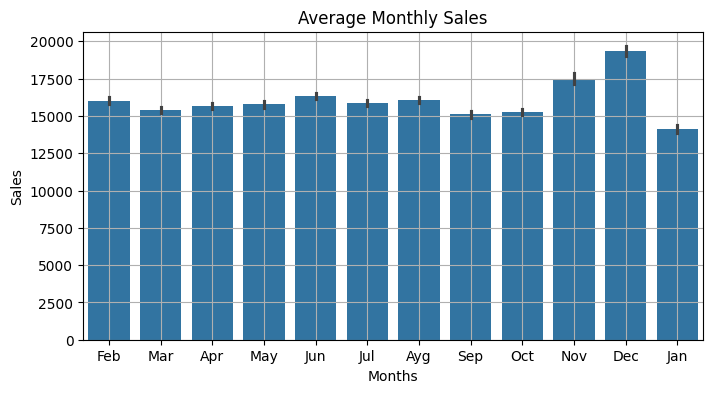

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Month', y='Weekly_Sales', data=df_plot)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.title('Average Monthly Sales')
plt.grid()

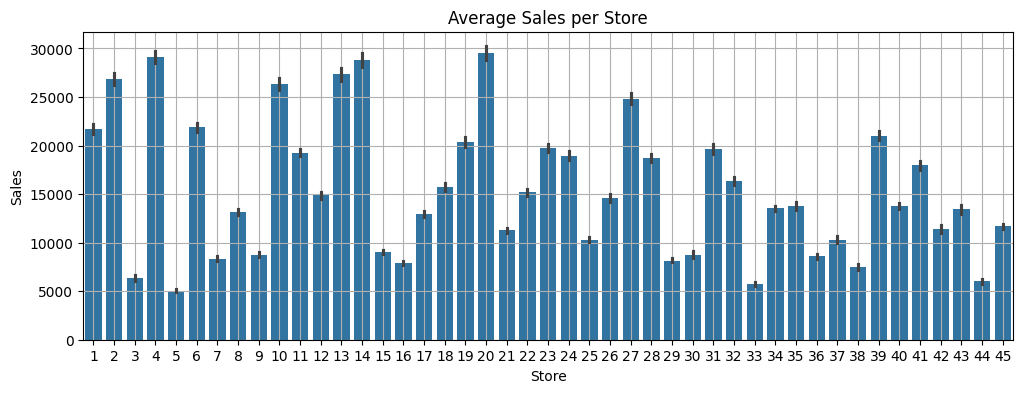

In [14]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Store', y='Weekly_Sales', data=df_plot)
plt.ylabel('Sales')
plt.xlabel('Store')
plt.title('Average Sales per Store')
plt.grid()

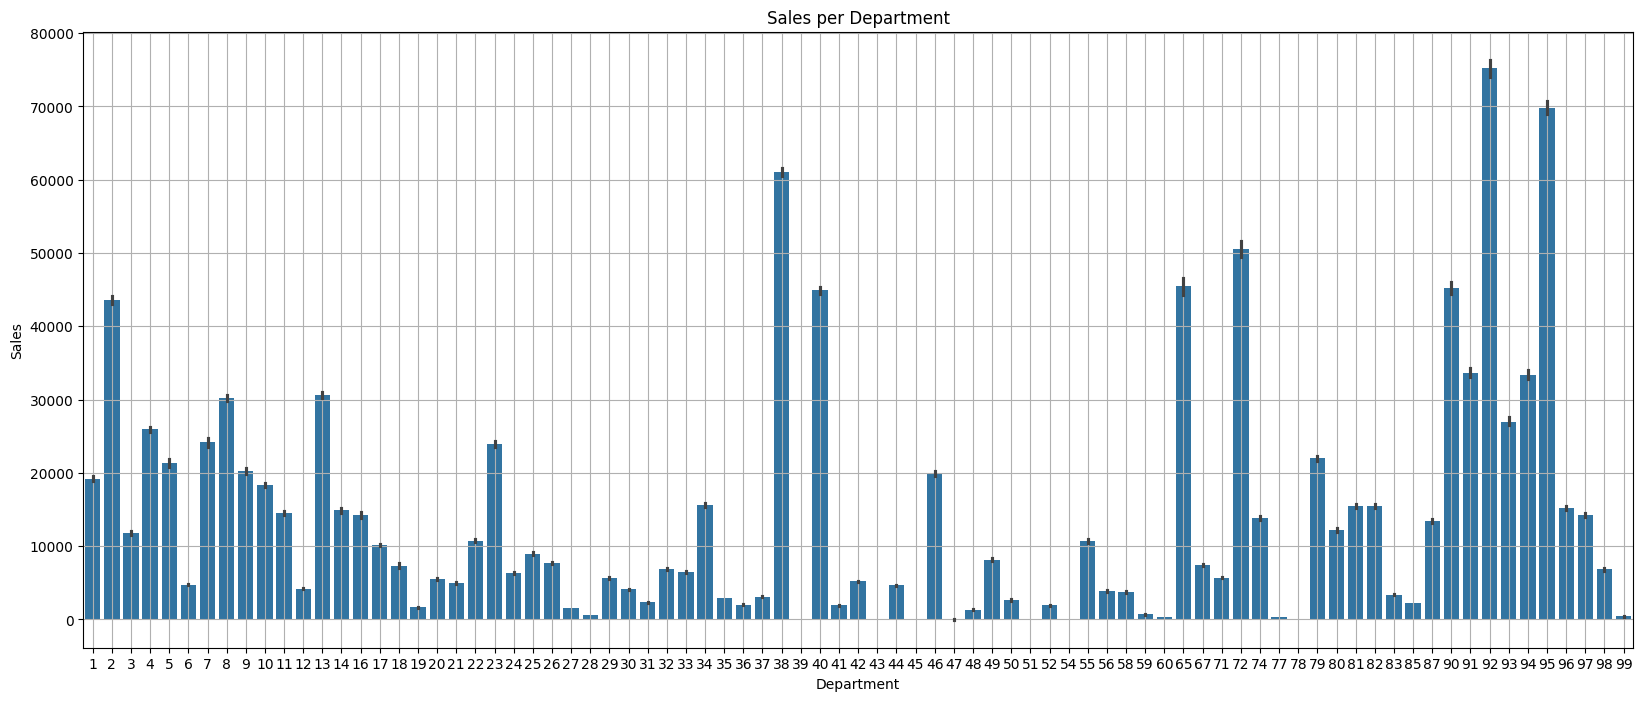

In [15]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept', y='Weekly_Sales', data=df_train)
plt.title('Sales per Department')
plt.ylabel('Sales')
plt.xlabel('Department')
plt.grid('on')

# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

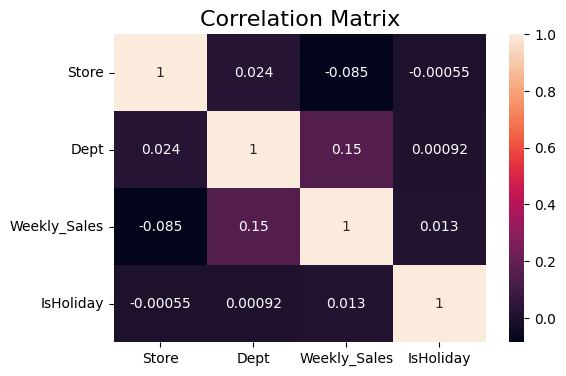

In [16]:
corr = df_train.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

In [17]:
features = df_train.drop(['Weekly_Sales'], axis=1)
target = df_train['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20, random_state=42)

print(f'X_train shape:', X_train.shape)
print(f'y_train shape:', y_train.shape)

print(f'X_val shape:', X_val.shape)
print(f'y_val:', y_val.shape)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_val, y_val)

X_train shape: (337256, 3)
y_train shape: (337256,)
X_val shape: (84314, 3)
y_val: (84314,)


0.03090747788058923

# Data Aggregation

In [18]:
df_train_grouped = df_train.groupby(['Store', 'Dept'])
df_train_grouped.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-05,29,5,15552.08,False
2010-02-05,29,6,3200.22,False
2010-02-05,29,7,10820.05,False
2010-02-05,29,8,20055.64,False
...,...,...,...,...
2012-10-19,42,24,3.97,False
2012-10-26,33,49,5.00,False
2012-10-26,36,49,5.00,False


In [19]:
df_aggregation = df_train_grouped['Weekly_Sales'].agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
df_aggregation.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


# Combine Dataframes

In [20]:
df_combined = pd.merge(left=df_train, right=df_aggregation, on=['Store', 'Dept'], how ='left')
df_combined.head()

,Store,Dept,Weekly_Sales,IsHoliday,max,min,mean,median,std
0,1,1,24924.50,False,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,29,5,15552.08,False,69467.35,6642.10,12931.821259,10898.36,8868.631880
2,29,6,3200.22,False,26440.84,805.79,3289.884965,2684.12,3058.515710
3,29,7,10820.05,False,99680.98,5642.05,16854.082238,13066.83,12955.930323
4,29,8,20055.64,False,28478.15,16859.93,20680.465944,20490.17,1618.396782


In [21]:
df_combined.isna().sum()

Store            0
Dept             0
Weekly_Sales     0
IsHoliday        0
max              0
min              0
mean             0
median           0
std             37
dtype: int64

### Fill with means

In [22]:
df_combined['std'].fillna(df_combined['std'].mean(), inplace=True)

In [23]:
df_combined.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
max             0
min             0
mean            0
median          0
std             0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

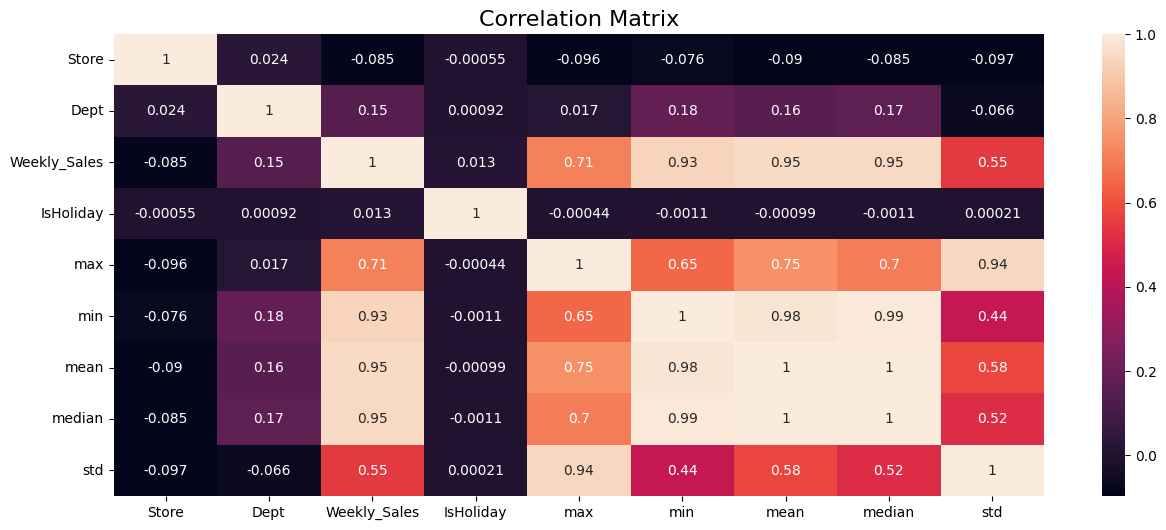

In [24]:
corr = df_combined.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(corr, vmax=1.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

In [25]:
features = df_combined.drop(['Weekly_Sales'], axis=1)
target = df_combined['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20, random_state=42)

print(f'X_train shape:', X_train.shape)
print(f'y_train shape:', y_train.shape)

print(f'X_val shape:', X_val.shape)
print(f'y_val:', y_val.shape)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_val, y_val)

X_train shape: (337256, 8)
y_train shape: (337256,)
X_val shape: (84314, 8)
y_val: (84314,)


0.909618510424662

# Results

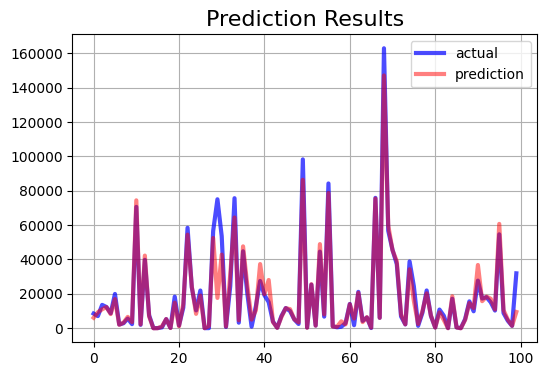

In [26]:
plt.figure(figsize=(6, 4))
plt.title('Prediction Results', fontsize=16)
plt.plot(y_val[:100].values, label='actual', linewidth=3.0, color='b', alpha=0.7)
plt.plot(linear_model.predict(X_val[:100]), label='prediction', linewidth=3.0, color='r', alpha=0.5)
plt.legend()
plt.grid('on')

# K-Cross Folding

In [27]:
from sklearn.model_selection import KFold

In [28]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
linear_model = LinearRegression()

fold_scores = []

for fold_id, (train_index, test_index) in enumerate(kf.split(features)):

    X_train_fold, X_val_fold = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train_fold, y_val_fold = target[train_index], target[test_index]

    linear_model.fit(X_train_fold, y_train_fold)

    fold_score = linear_model.score(X_val_fold, y_val_fold)

    print(f'Fold {fold_id}, score: {fold_score:.4f}')
    
    fold_scores.append(fold_score)


avg_fold_score = sum(fold_scores) / len(fold_scores)
print(f'Average score: {avg_fold_score:.4f}')

Fold 0, score: 0.9096
Fold 1, score: 0.8959
Fold 2, score: 0.9118
Fold 3, score: 0.9114
Fold 4, score: 0.8890
Average score: 0.9036


# Quantile Regression For Prediction Intervals

In [29]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [30]:
quantiles = [0.99, 0.5, 0.01]
hist_quantiles = {}

for quantile in quantiles:
    q_model = HistGradientBoostingRegressor(
        loss='quantile',
        learning_rate=0.05,
        max_depth=2,
        max_bins=32, 
        max_iter=50,
        quantile=quantile
    ).fit(X_train, y_train)
    
    hist_quantiles[f'quantile={quantile:.2f}'] = q_model

In [31]:
hist_quantiles

{'quantile=0.99': HistGradientBoostingRegressor(learning_rate=0.05, loss='quantile', max_bins=32,
                               max_depth=2, max_iter=50, quantile=0.99),
 'quantile=0.50': HistGradientBoostingRegressor(learning_rate=0.05, loss='quantile', max_bins=32,
                               max_depth=2, max_iter=50, quantile=0.5),
 'quantile=0.01': HistGradientBoostingRegressor(learning_rate=0.05, loss='quantile', max_bins=32,
                               max_depth=2, max_iter=50, quantile=0.01)}

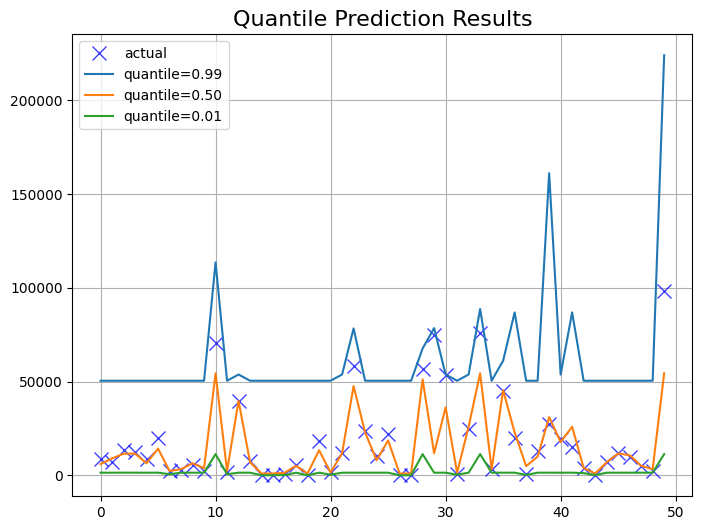

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Quantile Prediction Results', fontsize=16)
plt.plot(y_val[:50].values, 'x', alpha=0.75, markersize=10, c='b', label='actual')

for quantile_name, hist_model in hist_quantiles.items():
    plt.plot(hist_model.predict(X_val[:50]), label=quantile_name)

plt.legend()
plt.grid('on')

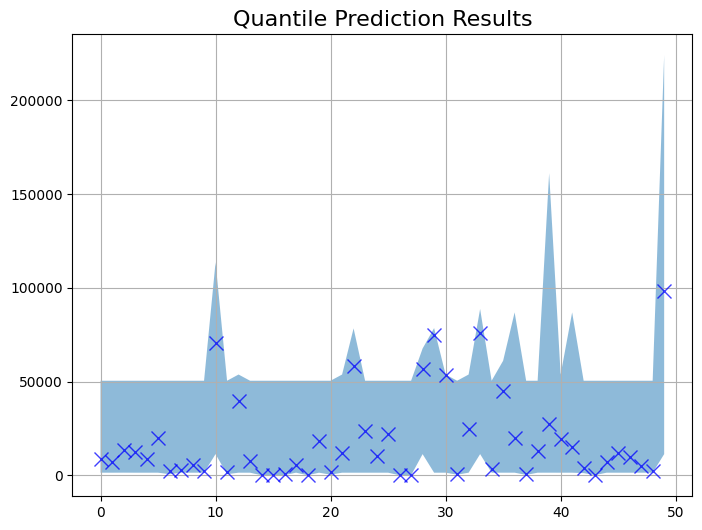

In [33]:
plt.figure(figsize=(8, 6))
plt.title('Quantile Prediction Results', fontsize=16)
plt.plot(y_val[:50].values, 'x', alpha=0.75, markersize=10, c='b', label='actual')

# 0.99 quantile
q_99_model = hist_quantiles['quantile=0.99']
# 0.01 quantile
q_01_model = hist_quantiles['quantile=0.01']

upper_bound = q_99_model.predict(X_val[:50])
lower_bound = q_01_model.predict(X_val[:50])

plt.fill_between(range(len(y_val[:50].values)), y1=upper_bound, y2=lower_bound, alpha=0.5)
plt.grid('on')